# Exploratory Data Analysis

### Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import warnings

warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows')
#pd.reset_option(“max_columns”)

# Imports function from GitHub
!curl -Os https://raw.githubusercontent.com/jgeorge313/DS_GA_1001_Capstone/main/Contributors/Visualize_features_Function.ipynb
%run Visualize_features_Function.ipynb

In [2]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/jgeorge313/DS_GA_1001_Capstone/main/Levels_Fyi_Salary_Data.csv')
raw_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


### Data Visualization

#### Missing Values

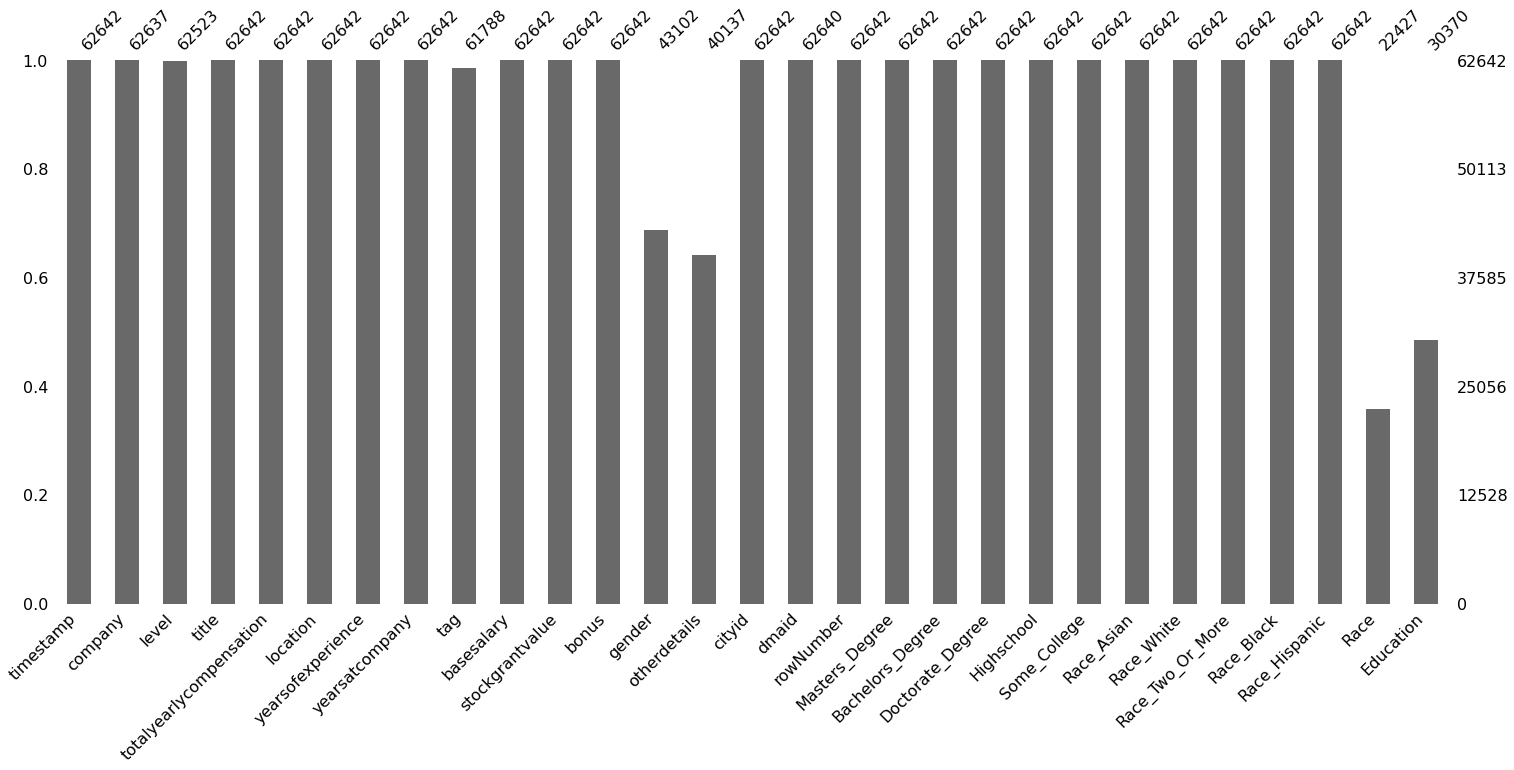

In [41]:
msno.bar(df)
plt.show()

#### General plots

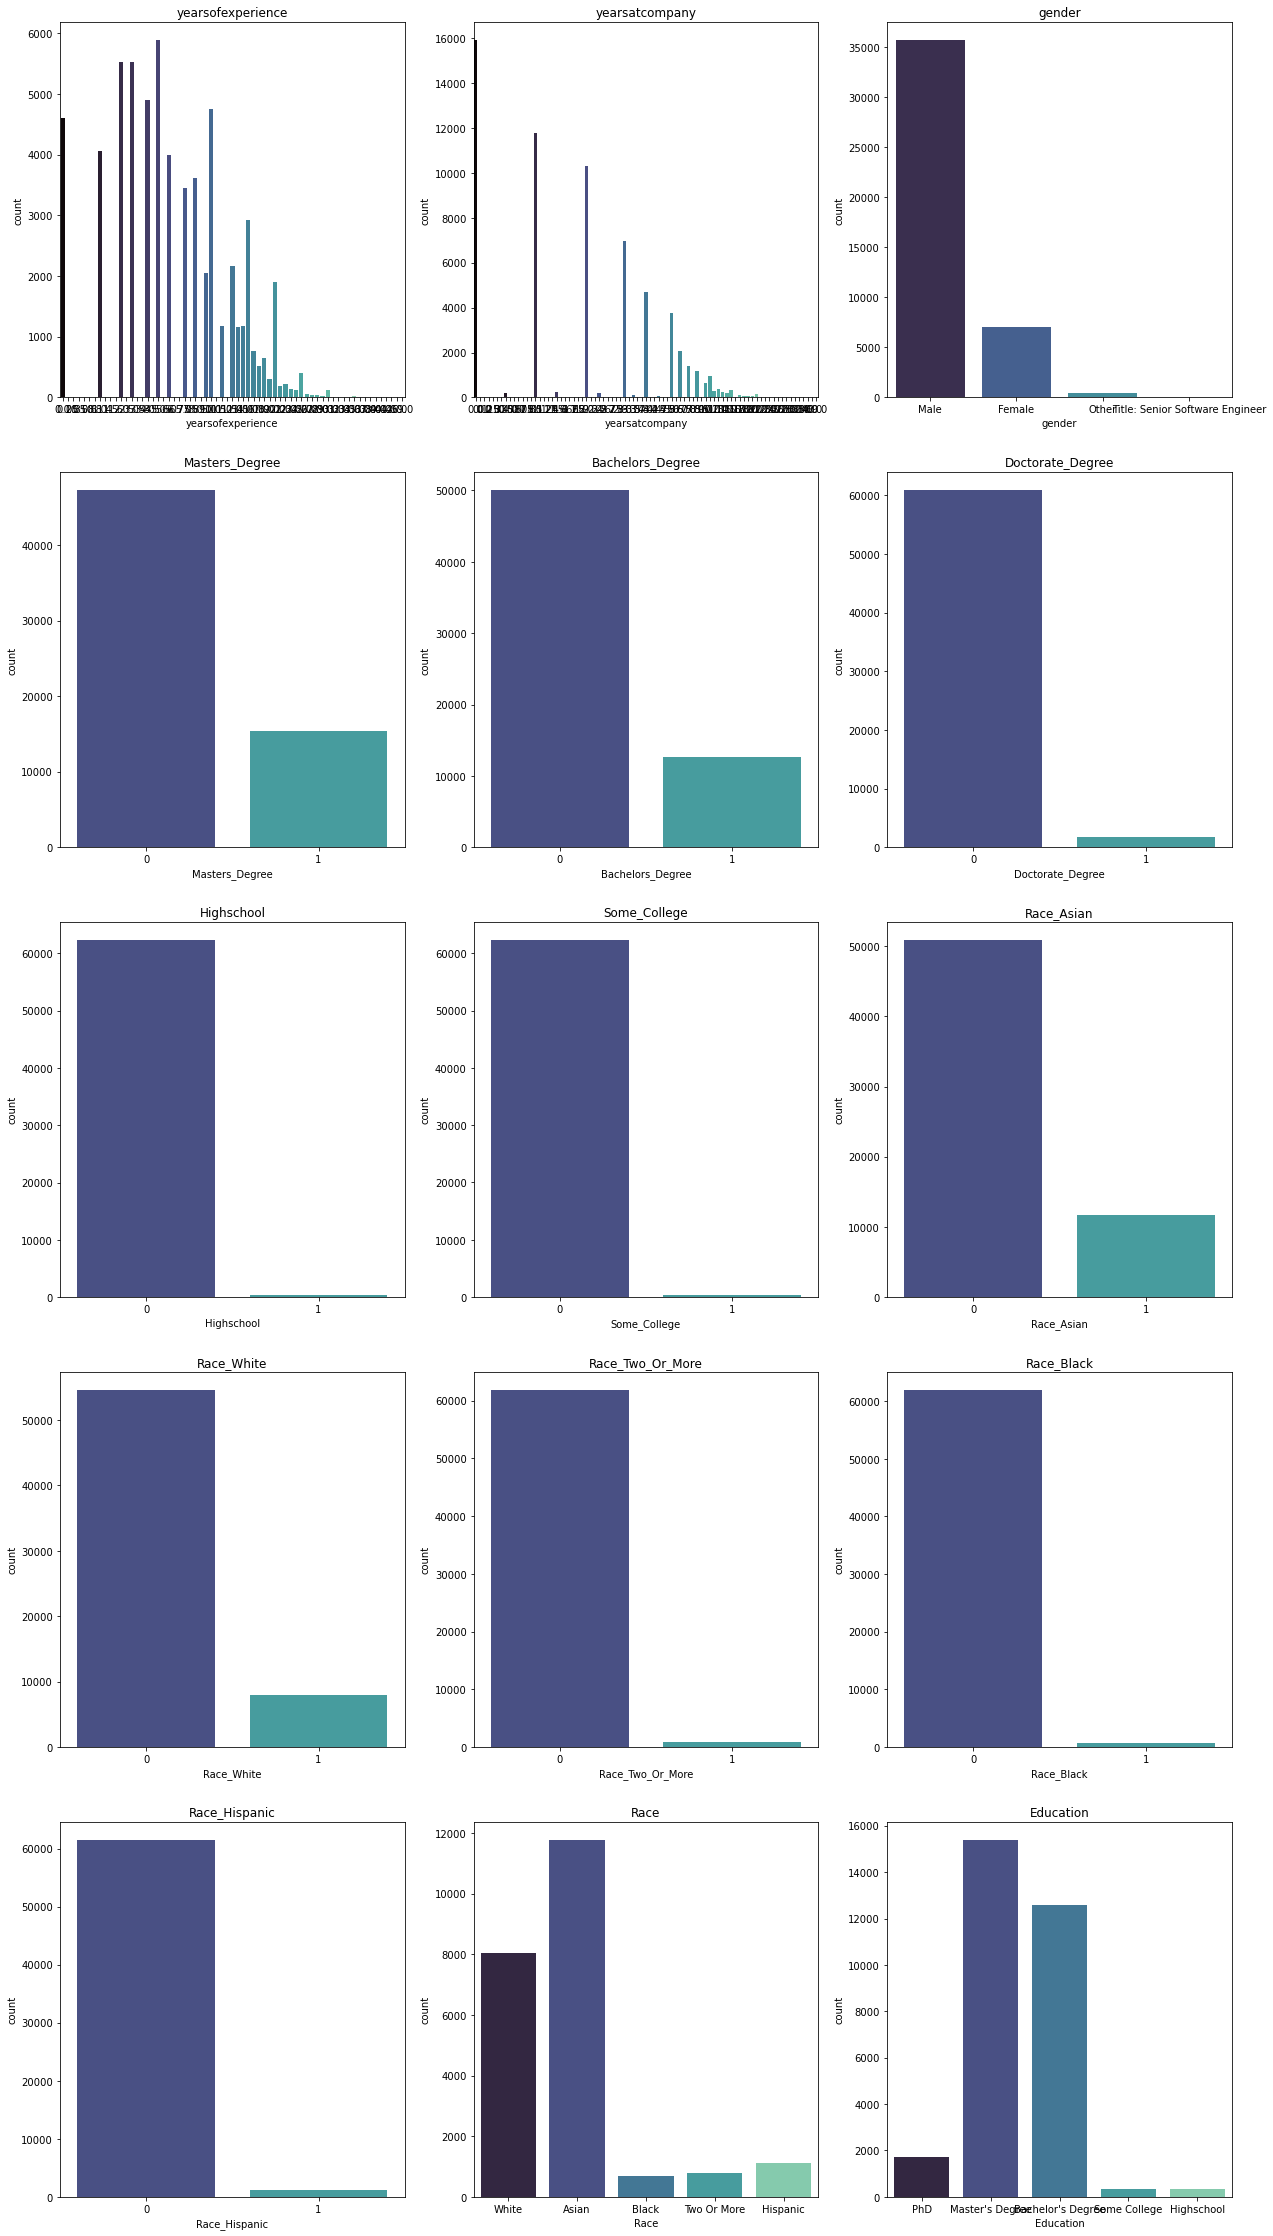

In [58]:
categorical_features = ['yearsofexperience', 'yearsatcompany', 'gender', 'Masters_Degree', 'Bachelors_Degree', 
                        'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 
                        'Race_Black', 'Race_Hispanic', 'Race', 'Education']

plot_features(df, categorical_features, is_categorical=True)

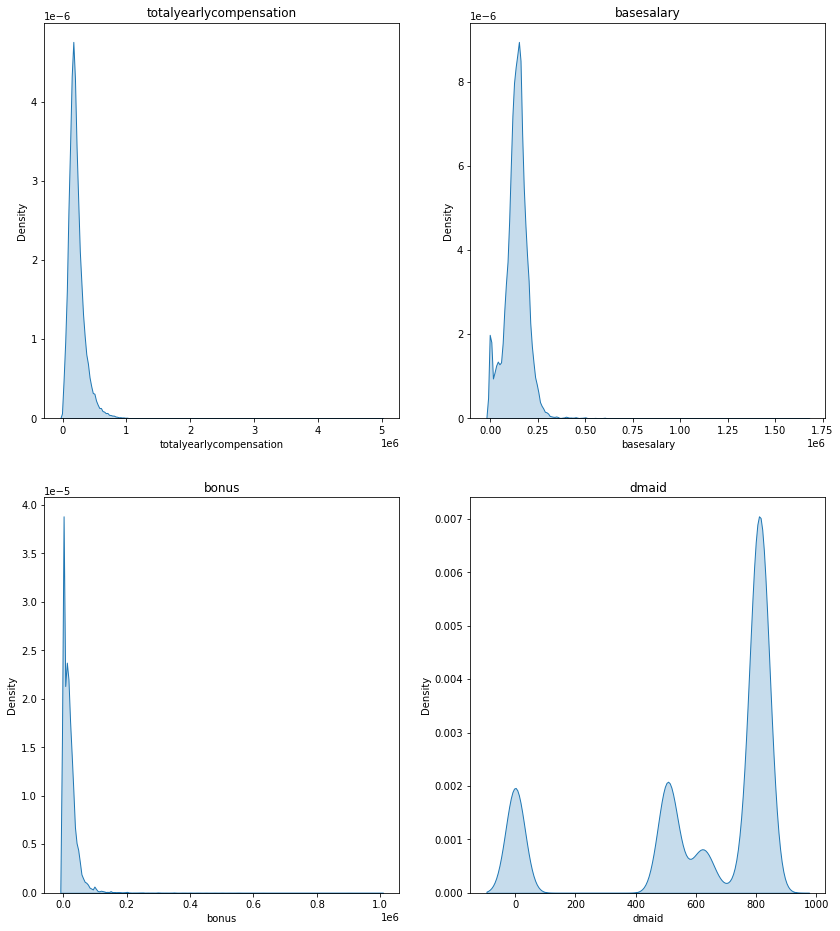

In [56]:
continuous_features = ['totalyearlycompensation', 'basesalary', 'bonus', 'dmaid']

plot_features(df, continuous_features, is_categorical=False)

In [57]:
#Skipped: timestamp, otherdetails, cityid, rowNumber

In [63]:
df['rowNumber'].value_counts().sort_index()

1        1
2        1
3        1
5        1
6        1
        ..
83870    1
83871    1
83872    1
83874    1
83875    1
Name: rowNumber, Length: 62642, dtype: int64

## Extra

In [175]:
df = raw_df[['company', 'title', 'totalyearlycompensation', 'level',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Education', 'Race']]

##### Data Cleaning

In [176]:
# Rounds the number of years of experience (reduces number of categories)
df.loc[:,'yearsofexperience'] = np.round(df.loc[:,'yearsofexperience'])
df.loc[:,'yearsatcompany'] = np.round(df.loc[:,'yearsatcompany'])

#Drop users that had a higher value for yearsatcompany than yearsofexperience
df.drop(df[(df.loc[:,'yearsatcompany'] - df.loc[:,'yearsofexperience']) > 0].index.to_list(), inplace=True)

#Drop level (too noisy) because its variation will probably be included in yearsofexperience and title
df.drop('level', axis=1, inplace=True)

In [43]:
df[df.loc[:,'yearsofexperience'] - df.loc[:,'yearsatcompany'] > 0][['totalyearlycompensation']].mean()

totalyearlycompensation    236393.181717
dtype: float64

In [44]:
df[df.loc[:,'yearsatcompany'] - df.loc[:,'yearsofexperience'] > 0][['totalyearlycompensation']].mean()

totalyearlycompensation    161573.964497
dtype: float64

In [143]:
temp = df[(df['yearsofexperience'].between(10, 15, inclusive=True))]

In [144]:
temp['yearsatcompany'].median()

3.0

In [148]:
low = temp[temp['yearsatcompany'] <= temp['yearsatcompany'].median()]
high = temp[temp['yearsatcompany'] > temp['yearsatcompany'].median()]

In [152]:
display(low['totalyearlycompensation'].median())
display(high['totalyearlycompensation'].median())

250000.0

235000.0

#### Hypothesis 1

$H_0$: Data Scientists that have worked longer in a company earn the same salary as people that have not worked as as much.<br>
$H_1$: Data Scientists that have worked longer in a company earn a higher salary than people that have not worked as as much.

*Controlling for 10 to 15 years of experience*

In [158]:
control_df = df[(df['yearsofexperience'].between(10, 15, inclusive=True))]

#Dividing the dataframe by the median years worked at the company
low = temp[temp['yearsatcompany'] <= temp['yearsatcompany'].median()]['totalyearlycompensation']
high = temp[temp['yearsatcompany'] > temp['yearsatcompany'].median()]['totalyearlycompensation']

print('Median years worked a company: {} years'.format(int(control_df['yearsatcompany'].median())))

Median years worked a company: 3 years


14       287000
15       218000
25       250000
40       250000
41       520000
          ...  
62600    425000
62611    350000
62615    173000
62631    421000
62637    327000
Name: totalyearlycompensation, Length: 7340, dtype: int64

In [173]:
raw_df.groupby('title')['level'].count()

title
Business Analyst                  876
Data Scientist                   2572
Hardware Engineer                2200
Human Resources                   362
Management Consultant             976
Marketing                         705
Mechanical Engineer               486
Product Designer                 1509
Product Manager                  4658
Recruiter                         448
Sales                             461
Software Engineer               41170
Software Engineering Manager     3565
Solution Architect               1157
Technical Program Manager        1378
Name: level, dtype: int64

In [163]:
raw_df[raw_df['']]

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Education,Race
0,Oracle,Product Manager,127000,"Redwood City, CA",2.0,2.0,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,150000.0,22000.0,NaN,NaN,NaN
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,73200.0,16000.0,NaN,NaN,NaN
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,25000.0,20000.0,NaN,NaN,NaN
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,57000.0,29000.0,NaN,NaN,NaN
